In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('data.csv')

In [4]:
# Convert all the string data into numerical data
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

In [5]:
# Split the dataset into a training set and a test set
X = df.drop(['def'], axis=1)
y = df['def']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a random forest Classifier and fit the model with data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [7]:
# Predict the target for the test dataset
y_pred = clf.predict(X_test)

In [8]:
# Calculate Accuracy: how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 93.5375777884155%


In [9]:
# Check your target default rate, adjust your model config if needed
default_rate = y_pred.mean()
print(f'Default Rate: {default_rate*100}%')

Default Rate: 0.04786979415988511%


In [10]:
# Graph the approval rate
cutoffs = np.arange(0.1, 1, 0.1)
approval_rates = []

for cutoff in cutoffs:
    y_pred = (clf.predict_proba(X_test)[:, 1] >= cutoff).astype(bool)
    approval_rate = 1 - y_pred.mean()
    approval_rates.append(approval_rate)

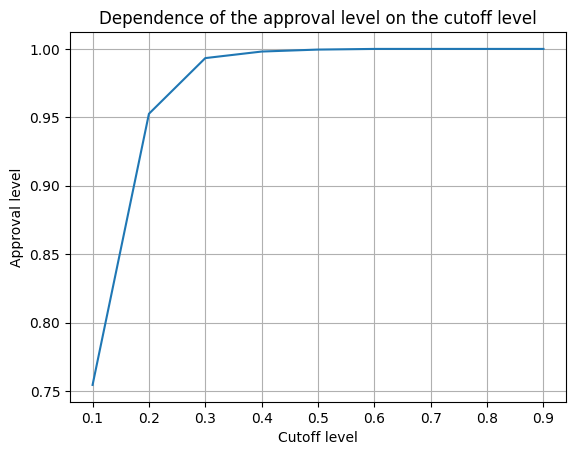

In [11]:
plt.plot(cutoffs, approval_rates)
plt.xlabel('Cutoff level')
plt.ylabel('Approval level')
plt.title('Dependence of the approval level on the cutoff level')
plt.grid(True)
plt.show()